## Ridge Model

Here’s a detailed example of how to use Ridge Regression in scikit-learn along with tuning hyperparameters using GridSearchCV. 
We'll walk through how to load data, set up the Ridge Regression model, define a range of hyperparameters, and perform grid search to find the best combination.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
'''
GridSearchCV is a tool provided by scikit-learn in Python that helps automate the process of finding the best combination of hyperparameters for a machine learning model.
After running GridSearchCV, the best combination of hyperparameters will be output based on cross-validation.


Hyperparameter:

In the context of Ridge Regression, the main hyperparameter is called alpha, which controls the regularization strength.
A hyperparameter is a parameter in machine learning models that is set before the learning process begins and controls how the model learns from the data.

Why Hyperparameters Matter:
Choosing the right hyperparameters can significantly affect a model’s performance. For example, in regularized models (like Ridge regression), 
choosing the right alpha prevents overfitting or underfitting, leading to better generalization on unseen data.

Hyperparameters are not learned from the data but are predefined and need to be tuned or optimized to improve model performance.
'''

'\nGridSearchCV is a tool provided by scikit-learn in Python that helps automate the process of finding the best combination of hyperparameters for a machine learning model.\nAfter running GridSearchCV, the best combination of hyperparameters will be output based on cross-validation.\n\n\nHyperparameter:\n\nIn the context of Ridge Regression, the main hyperparameter is called alpha, which controls the regularization strength.\nA hyperparameter is a parameter in machine learning models that is set before the learning process begins and controls how the model learns from the data.\n\nWhy Hyperparameters Matter:\nChoosing the right hyperparameters can significantly affect a model’s performance. For example, in regularized models (like Ridge regression), \nchoosing the right alpha prevents overfitting or underfitting, leading to better generalization on unseen data.\n\nHyperparameters are not learned from the data but are predefined and need to be tuned or optimized to improve model perfor

In [41]:
# Load the California Housing dataset
data = fetch_california_housing()

# Create a DataFrame for better understanding
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Display the first few rows of the dataset
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [43]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
# Separate features (X) and target (y)
X = df.drop('MedHouseValue', axis=1)  # Features
y = df['MedHouseValue']               # Target (median house value)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Ridge Regression model
ridge = Ridge()     #Ridge regression includes L2 regularization, which helps reduce overfitting by penalizing large coefficients


## Define Hyperparameters for Grid Search
In Ridge regression, the key hyperparameter is alpha, which controls the regularization strength. We will create a range of values for alpha and pass it to GridSearchCV to find the best value.

In [9]:
# Define a range of hyperparameter values for 'alpha' to test
params = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]  # Regularization strength values to test
}


## Perform Grid Search for Hyperparameter(alpha) Tuning
We will use GridSearchCV to test all possible values of alpha and find the best one based on cross-validation performance.

In [11]:
#We will use GridSearchCV to test all possible values of alpha and find the best one based on cross-validation performance i.e. cv.
ridge_reg = GridSearchCV(estimator=ridge, param_grid= params,scoring='r2',cv=5)

In [12]:
# Fit the model on the training data
ridge_reg.fit(X_train,y_train)    #here we are not taking ridge directly instead using ridge_reg model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]},
             scoring='r2')

In [37]:
print(ridge_reg.best_params_)
print(ridge_reg.best_estimator_)
print(f"Best cross-validated R-squared score: {ridge_reg.best_score_:.2f}")

#The value of ridge_reg.best_score_  from a GridSearchCV result represents the best cross-validated score (in my case, R-squared) obtained for the optimal hyperparameter (like alpha in Ridge regression). 
#This score indicates how well your model performs during cross-validation.

{'alpha': 10.0}
Ridge(alpha=10.0)
Best cross-validated R-squared score: 0.61


## Evaluate the Model
Once we’ve found the best alpha, we can use the resulting model to make predictions on the test set and evaluate it using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [15]:
# Make predictions on the test data using the best model
best_ridge_model = ridge_reg.best_estimator_   #here best estimator is Ridge(alpha=10.0)
print(best_ridge_model)
y_pred = best_ridge_model.predict(X_test)

Ridge(alpha=10.0)


In [16]:
# Calculate Mean Squared Error and R-squared for model's performance evaluation;how our predicted values differ from actual target values based upon metrics we will get to know
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")  #
print(f"R-Squared: {r2:.2f}")  #The closer the score is to 1.0, the better the model explains the variance in the target variable. SO in my case it is 0.6 which isnot so bad as well and not so good

Mean Squared Error: 0.56
R-Squared: 0.58


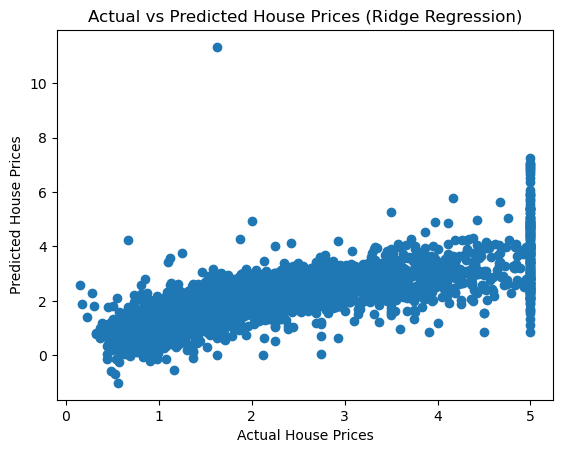

In [17]:
# Scatter plot of actual vs predicted house values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Ridge Regression)')
plt.show()

 ## Key Takeaways:
alpha controls the strength of regularization. Higher values of alpha shrink the model coefficients more, helping reduce overfitting.
    
GridSearchCV is a powerful tool for hyperparameter tuning. It automates the process of testing multiple hyperparameter combinations and cross-validates the results to find the best performing model.
    
Ridge regression is useful when multicollinearity exists in the data or when you want to regularize (shrink) the model’s coefficients to avoid overfitting.